# 【練習問題】自動車の走行距離予測

[リンク](https://signate.jp/competitions/121)

８つの説明変数から、目的変数を予測する


In [66]:
import pandas as pd
import numpy as np

In [67]:
# データフレーム作成
df = pd.read_csv('D:/Python/Jupyter/ds/train.tsv', sep='\t',encoding='utf-8')
df.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [68]:
df.columns

Index(['id', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [69]:
df.dtypes

id                int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [70]:
df.shape

(199, 10)

In [71]:
print(len(df), len(df['id'].unique()))

199 199


~~ここまで問題なし~~
馬力が数値で無い！

In [72]:
df['id'].unique()

array([  0,   3,   9,  11,  13,  16,  18,  19,  23,  24,  25,  28,  31,
        32,  35,  36,  38,  39,  40,  41,  42,  43,  44,  47,  48,  50,
        53,  57,  58,  62,  67,  69,  70,  71,  72,  75,  77,  79,  80,
        82,  83,  84,  86,  87,  88,  91,  93,  94,  95,  98,  99, 104,
       105, 109, 110, 111, 115, 117, 118, 119, 121, 123, 125, 127, 128,
       129, 130, 131, 139, 143, 147, 148, 149, 151, 152, 157, 160, 161,
       163, 165, 166, 169, 172, 174, 177, 178, 180, 182, 183, 184, 185,
       187, 188, 189, 192, 193, 195, 197, 201, 202, 203, 204, 205, 207,
       208, 209, 211, 213, 217, 222, 226, 227, 228, 234, 237, 239, 240,
       242, 243, 244, 247, 248, 249, 251, 252, 255, 256, 257, 258, 262,
       264, 265, 266, 267, 268, 270, 272, 273, 275, 276, 277, 278, 279,
       283, 285, 288, 290, 291, 292, 297, 300, 301, 305, 306, 307, 311,
       313, 314, 315, 316, 318, 321, 323, 325, 329, 333, 335, 336, 337,
       338, 339, 340, 343, 344, 345, 349, 351, 353, 354, 355, 35

In [73]:
df.describe()

,id,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,200.170854,24.307035,5.296482,183.311558,2883.839196,15.647739,76.165829,1.582915
std,113.432759,7.797665,1.644562,98.400457,819.766870,2.701885,3.802928,0.798932
min,0.000000,9.000000,3.000000,71.000000,1613.000000,8.500000,70.000000,1.000000
25%,98.500000,18.000000,4.000000,98.000000,2217.500000,14.000000,73.000000,1.000000
50%,202.000000,24.000000,4.000000,140.000000,2702.000000,15.500000,76.000000,1.000000
75%,294.500000,30.500000,6.000000,250.000000,3426.500000,17.150000,80.000000,2.000000
max,396.000000,44.600000,8.000000,454.000000,5140.000000,23.700000,82.000000,3.000000


NULLは無いことが分かる

In [74]:
# idをindexにする
df.set_index('id', inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
id,,,,,,,,,
0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


## カラムについて

|カラム名|型|説明|
|-|-|-|
|mpg|float|ガソリン１ガロンあたりの走行距離<br>（mile par gallon の略）<br>**目的変数**
|cylinders|varchar|シリンダー
|displacement|float|~~変位~~  排気量
|horsepower|float|馬力
|weight|float|重量
|acceleration|float|加速度
|model year|varchar|年式
|origin|varchar|起源
|car name|varchar|車名

- シリンダー
  - 直列3気筒 とか V型8気筒 とか言うあれ。
- 加速度
  - わからん
- 馬力
  - 一定の時間内に
  - どれだけ重い荷物を
  - どれだけ遠くに運べるか
  - を決めたもの。
  - 1秒あたり75kgを1メートル動かす性能を1馬力

In [75]:
# とりあえず、min/max
df.min(axis=0)

mpg                                   9
cylinders                             3
displacement                         71
horsepower                        100.0
weight                             1613
acceleration                        8.5
model year                           70
origin                                1
car name        amc ambassador brougham
dtype: object

In [76]:
df.max(axis=0)

mpg                         44.6
cylinders                      8
displacement                 454
horsepower                     ?
weight                      5140
acceleration                23.7
model year                    82
origin                         3
car name        vw rabbit custom
dtype: object

In [77]:
# 確認だけならdescribe()を使うべき
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,24.307035,5.296482,183.311558,2883.839196,15.647739,76.165829,1.582915
std,7.797665,1.644562,98.400457,819.766870,2.701885,3.802928,0.798932
min,9.000000,3.000000,71.000000,1613.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,98.000000,2217.500000,14.000000,73.000000,1.000000
50%,24.000000,4.000000,140.000000,2702.000000,15.500000,76.000000,1.000000
75%,30.500000,6.000000,250.000000,3426.500000,17.150000,80.000000,2.000000
max,44.600000,8.000000,454.000000,5140.000000,23.700000,82.000000,3.000000


In [78]:
# 馬力がおかしい
df['horsepower'].unique()

array(['84.00', '71.00', '108.0', '75.00', '62.00', '90.00', '105.0',
       '180.0', '113.0', '135.0', '120.0', '88.00', '165.0', '100.0',
       '69.00', '70.00', '60.00', '80.00', '132.0', '85.00', '130.0',
       '93.00', '?', '175.0', '68.00', '58.00', '110.0', '65.00', '67.00',
       '78.00', '48.00', '112.0', '86.00', '83.00', '81.00', '82.00',
       '92.00', '97.00', '76.00', '193.0', '148.0', '72.00', '170.0',
       '140.0', '220.0', '79.00', '198.0', '150.0', '64.00', '96.00',
       '138.0', '52.00', '145.0', '95.00', '160.0', '74.00', '54.00',
       '149.0', '139.0', '129.0', '63.00', '122.0', '200.0', '46.00',
       '153.0', '89.00', '155.0', '61.00', '215.0', '190.0', '115.0'],
      dtype=object)

In [79]:
# 馬力が'?'を抽出
exp = df[df['horsepower'] == '?']
exp

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
id,,,,,,,,,
48,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl
234,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
288,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
349,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto


In [80]:
# インデックスを指定して該当行削除
df = df.drop(exp.index)

In [81]:
# 削除確認
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
id,,,,,,,,,


In [82]:
# 馬力の型をちゃんとする
df['horsepower'] = df['horsepower'].astype(float)
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

## 相関

片っ端から

In [83]:
# matplotllib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.font_manager import FontProperties
font_path = 'C:\\Windows\\Fonts\\TakaoPGothic.ttf'
font_prop = FontProperties(fname=font_path)

In [84]:
# km/l と シリンダー
df[['mpg', 'cylinders']].corr()

,mpg,cylinders
mpg,1.000000,-0.773889
cylinders,-0.773889,1.000000


In [85]:
# km/l と 馬力
df[['mpg', 'horsepower']].corr()

,mpg,horsepower
mpg,1.000000,-0.791419
horsepower,-0.791419,1.000000


In [86]:
# km/l と 重さ
df[['mpg', 'weight']].corr()

,mpg,weight
mpg,1.000000,-0.821364
weight,-0.821364,1.000000


In [87]:
# km/l と 加速度
df[['mpg', 'acceleration']].corr()

,mpg,acceleration
mpg,1.000000,0.384631
acceleration,0.384631,1.000000


In [88]:
# km/l と 排気量
df[['mpg', 'displacement']].corr()

,mpg,displacement
mpg,1.000000,-0.806195
displacement,-0.806195,1.000000


車の走行距離と相関があるスペック
- 重さ
- 排気量
- シリンダー
- 馬力

つまり重さとエンジン性能

In [89]:
# 馬力と排気量は相関がありそう
df[['horsepower', 'displacement']].corr()

,horsepower,displacement
horsepower,1.000000,0.894965
displacement,0.894965,1.000000


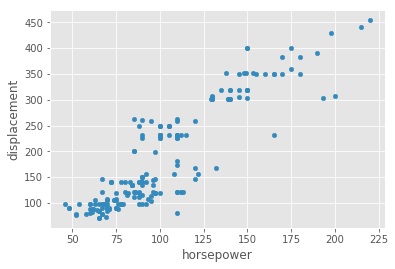

In [90]:
df.plot(kind='scatter', x='horsepower', y='displacement')

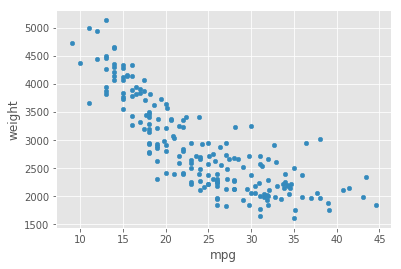

In [91]:
# 重いと燃費は悪い
df.plot(kind='scatter', x='mpg', y='weight')

Tableauで出す

![img](D:/Python/Jupyter/ds/sni001.PNG)

相関があるのは分かった  

mpgをグループに分割して、相関関係にあるデータを一緒に見る

手順
- dfをmpgの値を元に5 or 10毎ぐらいにスライス
- 分けたdf毎に、馬力・重さ・排気量・シリンダーと単純比較


In [92]:
df[df['mpg'] <= 10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
id,,,,,,,,,
118,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d
278,10.0,8,307.0,200.0,4376.0,15.0,70,1,chevy c20


In [93]:
# 複数条件指定 () & ()
# or : '|', not : '~'
df[(df['mpg'] > 10) & (df['mpg'] <= 20)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
id,,,,,,,,,
9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
18,16.0,6,250.0,105.0,3897.0,18.5,75,1,chevroelt chevelle malibu
19,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega
24,18.2,8,318.0,135.0,3830.0,15.2,79,1,dodge st. regis
25,16.5,6,168.0,120.0,3820.0,16.7,76,2,mercedes-benz 280s


In [94]:
# mpgの最大値は44
mpg1 = df[df['mpg'] <= 10]
mpg2 = df[(df['mpg'] > 10) & (df['mpg'] <= 20)]
mpg3 = df[(df['mpg'] > 20) & (df['mpg'] <= 30)]
mpg4 = df[(df['mpg'] > 30) & (df['mpg'] <= 40)]
mpg5 = df[(df['mpg'] > 40) & (df['mpg'] <= 50)]

mpg1.head(1).append(mpg2.head(1)).append(mpg3.head(1)).append(mpg4.head(1)).append(mpg5.head(1))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
id,,,,,,,,,
118,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d
9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
3,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
83,43.1,4,90.0,48.0,1985.0,21.5,78,2,volkswagen rabbit custom diesel


In [95]:
# 上のは何とも冗長なコードだ。

mpg_arr = []
for i in range(6):
    if i == 0:
        mpg_arr.append(df[df['mpg'] <= 10])
    else:
        mpg_arr.append(df[(df['mpg'] > i*10) & (df['mpg'] <= (i+1)*10)])

for i, arr in enumerate(mpg_arr):
    print('MPG', f'{(i*10):02d}', ' ~ ', (i+1)*10, ' : ', len(arr))

MPG 00  ~  10  :  2
MPG 10  ~  20  :  70
MPG 20  ~  30  :  74
MPG 30  ~  40  :  44
MPG 40  ~  50  :  5
MPG 50  ~  60  :  0


In [217]:
# そもそも列を追加すれば良いだけだった

# うまくいかん
def f(mpg):
    if mpg < 10:
        return ' 0 - 10'
    else:
        i = mpg//10 * 10
        j = (mpg+10)//10 *10
        return f'{i:1.0f} - {j:1.0f}'

# for i in range(len(df)):
#     df1 = df.assign(
#         round_mpg=f(df.iloc[i]['mpg'])
#     )

# 行を呼べば良い
def ff(row):
    if row.mpg < 10:
        return ' 0 - 10'
    else:
        i = row.mpg//10 * 10
        j = (row.mpg+10)//10 *10
        return f'{i:1.0f} - {j:1.0f}'

df['mpg_range'] = df.apply(ff, axis=1)
df['mpg_range'].unique()

array(['20 - 30', '30 - 40', '10 - 20', '40 - 50', ' 0 - 10'],
      dtype=object)

In [223]:
# グループ分けしたかった
df[['mpg', 'mpg_range']].sort_values('mpg')

,mpg,mpg_range
id,,
118,9.0,0 - 10
278,10.0,10 - 20
367,11.0,10 - 20
19,11.0,10 - 20
243,12.0,10 - 20
325,12.0,10 - 20
333,13.0,10 - 20
247,13.0,10 - 20
93,13.0,10 - 20


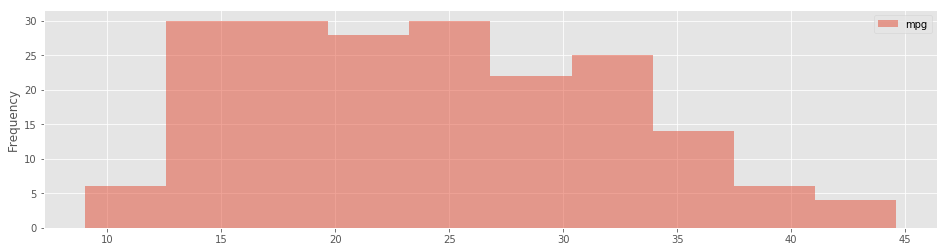

In [97]:
# 分布を見るならヒストグラムが良い
df.plot(kind='hist', y='mpg', bins=10, figsize=(16,4), alpha=0.5)